## BSA fitting using bins in Phi

The purpose of this file is to do BSA fitting for RGA data selected for Exclusive Rho using bins in phi instead of a MLM fit

$$\frac{d\sigma_+-d\sigma_-}{d\sigma_+ + d\sigma_- }  = \alpha \sin \phi$$
where 
$$ \alpha = \frac{\sqrt{2\epsilon (1-\epsilon)}F_{LU}^{\sin \phi}}{F_{UU}} $$

In [1]:
import ROOT
from ROOT import RooRealVar, RooArgSet, RooDataSet, RooAbsPdf, RooFit, TMath, RooDataHist,RooDataSet
import os
import numpy as np
import array

In [2]:
inputFiles = ["out/pippi0_fall2018_in_pass2/pippi0_fall2018_in_pass2.root","out/pippi0_spring2019_in_pass2/pippi0_spring2019_in_pass2.root"]

In [3]:
chain = ROOT.TChain("pippi0")

for f in inputFiles:
    chain.Add(f)

In [4]:
[branch.GetName() for branch in chain.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true']

In [5]:
h_neg = ROOT.TH1F("h_neg","h_neg;#phi_h",100,-3.14,3.14)
h_pos = ROOT.TH1F("h_pos","h_pos;#phi_h",100,-3.14,3.14)
A = ROOT.TH1F("A","A;#phi_h",100,-3.14,3.14)
h_neg.Sumw2() #for error propogation
h_pos.Sumw2()
A.Sumw2()

In [6]:
fit = ROOT.TF1("fit","[0]*sin(x)",-3.14,3.14) #"name","fit_type",min,max
fit.SetLineWidth(4)
fit.SetLineColor(ROOT.kBlue)
fit.SetLineStyle(2)

In [7]:
def RunPlotting(A_vals,bin_centers,
                leg_title, graph_title,
                obs_str):
    c = ROOT.TCanvas()
    c.SetTickx()
    c.SetTicky()
    c.SetGridx()
    c.SetGridy()
    
    x = np.array(bin_centers, dtype='float64')
    y = np.array(A_vals, dtype='float64')
    x_errs = np.zeros_like(x)
    y_errs = np.zeros_like(y)

    
    gr = ROOT.TGraphErrors(len(x),x,y,x_errs,y_errs)
    
    gr.SetMarkerColor(ROOT.kBlack)
    gr.SetMarkerStyle(20)
    gr.SetTitle(graph_title)
    gr.GetXaxis().SetTitle(obs_str)
    gr.GetYaxis().SetTitle("F_{LU}^{sin#phi}/F_{UU}")
    gr.GetYaxis().SetRangeUser(-0.3, max(y) * 1.2)
    
    leg = ROOT.TLegend(0.55,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
    leg.AddEntry(gr,leg_title,"p") #name of object being referred, "title shown", (fit line or point)
    leg.SetBorderSize(1)
    
    gr.Draw("AP")
    leg.Draw()
    c.SaveAs("out/test/phi_test2.png")
    
    return

In [8]:
def fitToSin(h_neg,h_pos,bnmin,bnmax):
    num = h_pos.Clone("num")  
    
    
    num.Add(h_neg, -1)         # Asym = h_pos - h_neg
    
    denom = h_pos.Clone("denom")
    denom.Add(h_neg)      # denominator = h_neg + h_pos
    
    A.Divide(num,denom)    # Asym = (h_neg - h_pos) / (h_neg + h_pos)

    fit = ROOT.TF1("fit","[0]*sin(x)",bnmin,bnmax) 
    
    A.Fit("fit","R")

    c = ROOT.TCanvas()
    A.Draw()
    fit.Draw("same")
    c.Draw()

    print("ch2/ndf:",fit.GetChisquare()/fit.GetNDF())
    return c,fit.GetParameter(0)

fitting bin  1
ch2/ndf: 1.1183708832252761
fitting bin  2
ch2/ndf: 1.0262807818339192
fitting bin  3
ch2/ndf: 1.230025834387598
fitting bin  4
ch2/ndf: 1.575533067817363
fitting bin  5
ch2/ndf: 1.4196382301449928
fitting bin  6
ch2/ndf: 1.9953278807074215
fitting bin  7
ch2/ndf: 1.9595317756364599
fitting bin  8
ch2/ndf: 2.090285954148866
fitting bin  9
ch2/ndf: 1.7131623247800427
fitting bin  10
ch2/ndf: 2.412230511788847
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      4.47348
NDf                       =            4
Edm                       =  3.55484e-20
NCalls                    =           13
p0                        =     0.548904   +/-   0.756468    
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      46.1826
NDf                       =           45
Edm                       =  1.07826e-19
NCalls                    =           13
p0                        =    0.0680641 

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
IOStream.flush timed out
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


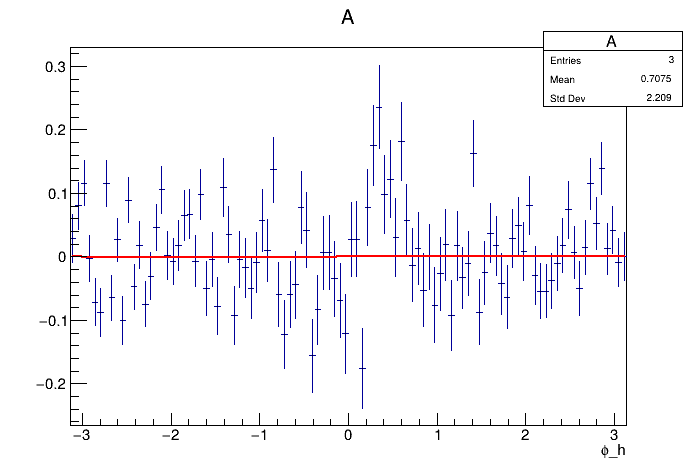

In [9]:
bn_edges = np.linspace(0.5,1,11)
ratio_list = []
for bn_idx in range(len(bn_edges)-1):
    print("fitting bin ",bn_idx+1)
    chain.Project("h_neg","phi",f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05&&hel==-1&&z>{bn_edges[bn_idx]}&&z<{bn_edges[bn_idx+1]}")
    chain.Project("h_pos","phi",f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05&&hel==1&&z>{bn_edges[bn_idx]}&&z<{bn_edges[bn_idx+1]}")
    c,A_val = fitToSin(h_neg,h_pos,-3.14,3.14)

    h = ROOT.TH1F("h","h",100,0.5,1)
    chain.Draw("eps >> h", f"z > {bn_edges[bn_idx]} && z < {bn_edges[bn_idx+1]}", "goff")
    eps_avg = h.GetMean()
    depolarization = np.sqrt(2*eps_avg*(1-eps_avg))
    
    ratio_list.append(A_val/depolarization)
    
    

In [10]:
bn_centers = []
for bn_idx in range(len(bn_edges)-1):
    bn_centers.append(bn_edges[bn_idx]+0.5*(bn_edges[bn_idx+1]-bn_edges[bn_idx]))
print("x = ",bn_centers,"y =",ratio_list)
RunPlotting(ratio_list,bn_centers,
                "RGA_inbending", "F_{LU}^{sin#phi}/F_{UU}",
                "z")

x =  [0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.8250000000000001, 0.875, 0.925, 0.975] y = [0.8036245540067948, 0.10074579479789607, 0.06466856972728374, 0.03488121233850904, 0.1377384208025711, 0.07861392530945985, 0.010873372230868416, 0.028927804865499982, 0.03186248206848369, 0.0016298872775100171]


Info in <TCanvas::Print>: png file out/test/phi_test2.png has been created


In [11]:
print(len(bn_centers),len(ratio_list))

10 10
